In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *
import pandas as pd
import scipy as sc
import os as os
import re as re

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

No data source; no values for C, offset, and catalytic rate
Running iterative method with 20 iterations
MSD = 1295.9978134697571
MSD = 1356.0144921204705
MSD = 1416.0248831290623
MSD = 1476.0296525912045
MSD = 1536.028724841266
MSD = 1596.0214042862165
MSD = 1656.0064487527716
MSD = 1715.9821133180315
MSD = 1775.9461769655063
MSD = 1835.8959600295425
MSD = 1895.8283374894495
MSD = 1955.739751248027
MSD = 2015.6262232499937
MSD = 2075.483370449049
MSD = 2135.306422076128
MSD = 2195.090239301641
MSD = 2254.829337158004
MSD = 2314.5179084530073
MSD = 2374.149849330523
MSD = 2433.718786102774


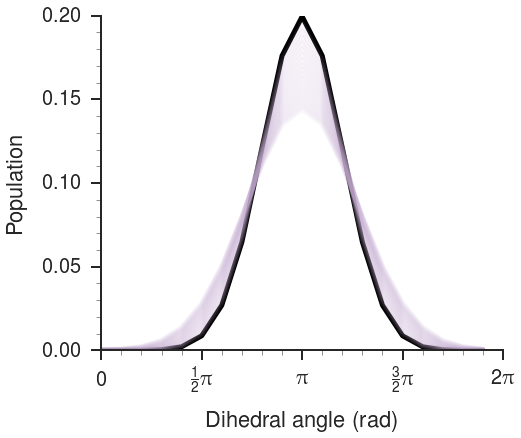

In [8]:
name = 'psiSER311'
this = simulation(data_source = 'manual')
this.name = name
this.unbound_population = np.array([1] * 20)
this.bound_population = np.array([1] * 20)
this.iterations = 20
this.C_intersurface = 0.24 * 10 ** 6
this.offset_factor = 6
this.catalytic_rate = 140
this.simulate()


In [1]:
fig = plt.figure(figsize=(6*1.2, 6))
ax = fig.add_subplot(111)
ax.plot(this.msd, c=this.unbound_clr)
ax.set_xlabel(r'Iteration [$\mathrm{{d}}t = 10^{{ {0:0.0f} }}$]'.format(np.log10(this.dt)))
ax.set_ylabel(r'MSD (degree$^2$)')

slope, intercept, r_value, p_value, std_err = sc.stats.linregress(range(len(this.msd)),this.msd)
print('{0:.4g}'.format( (slope/2) * 1/(this.dt)))
ax.plot(range(len(this.msd)), slope*range(len(this.msd)) + intercept, c='k', ls='--', lw=2, 
        label=r'$Calculated D = {0:.3g} \times 10^{{12}}$'.format(  ((slope/2) * 1/(this.dt))/1e12  ))


ax.legend(loc=2)
aesthetics.paper_plot(fig, scientific=False)

NameError: name 'plt' is not defined

In [52]:
D = (slope/2) * 1/(this.dt)
print('{0:0.2f}'.format(D))

2994091847985.67


In [7]:
slope, intercept, r_value, p_value, std_err = sc.stats.linregress(range(len(this.msd)),this.msd)
print('{0:.4g}'.format( (slope/2) * 1/(this.dt)))
# This should match `D` in the code, which is 3e15 :-)

AttributeError: 'simulation' object has no attribute 'msd'

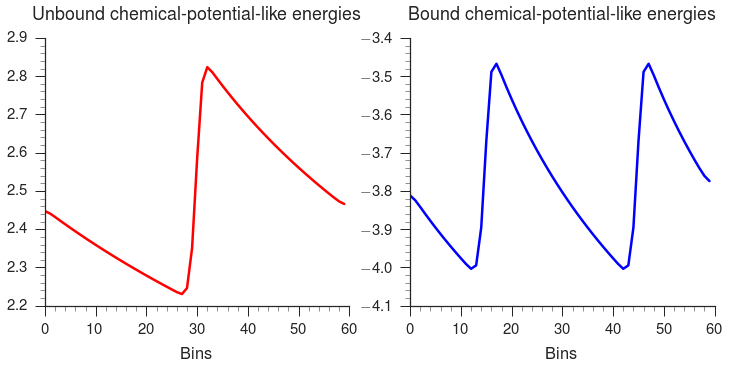

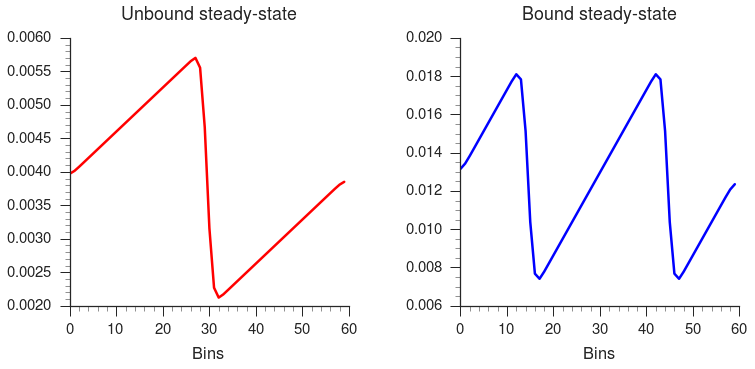

Eigenvector method: C_intrasurface = 8.33e+13, C_intersurface = 240000.0, catalytic rate = 140, cATP = 0.002, dt = 1e-15


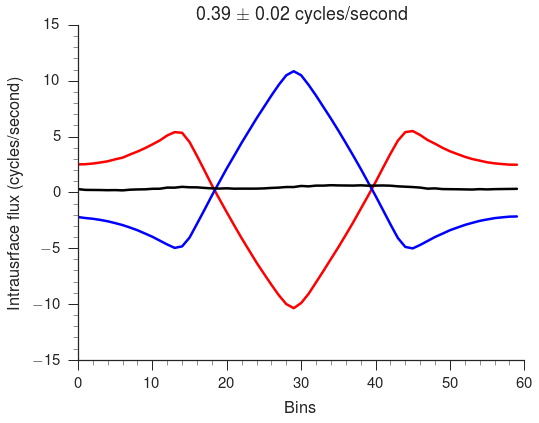

In [5]:
name = 'Test'
this = simulation()
this.unbound_population = np.array([variable_saw(10, i, 60)+10 for i in range(60)])
this.bound_population = np.array([(variable_saw(10, i, 30)+10) for i in range(60)])
this.bins = 60
this.iterations = 0
this.simulate(debug=True, pka_md_data=False, plot=True)


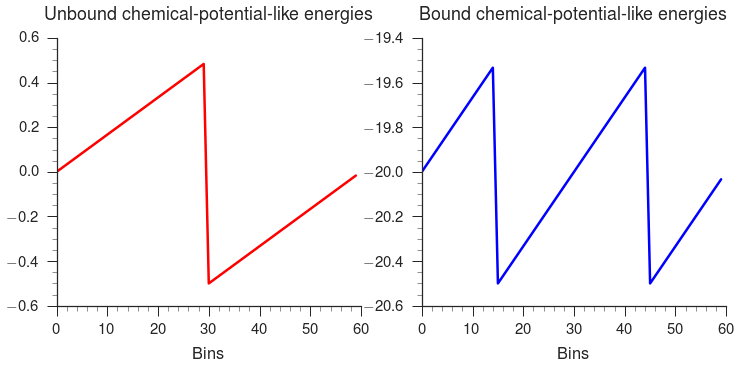

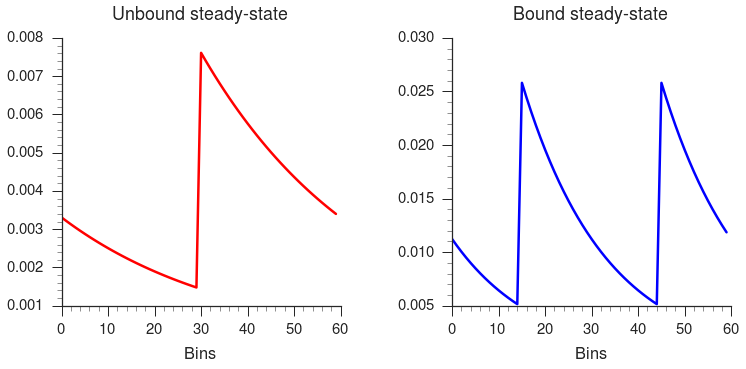

Eigenvector method: C_intrasurface = 8.33e+13, C_intersurface = 240000.0, catalytic rate = 140, cATP = 0.002, dt = 1e-15


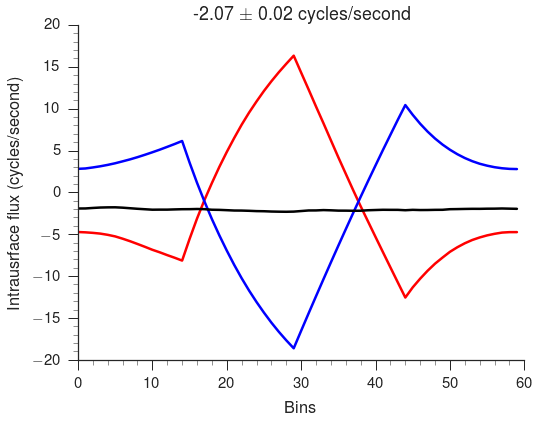

In [12]:
name = 'Test'
this = simulation()
this.unbound = np.array([variable_saw(1, i, 60) for i in range(60)])
this.bound = np.array([(variable_saw(1, i, 30)-20) for i in range(60)])
this.bins = 60
this.iterations = 0
this.simulate(debug=True, pka_md_data=False, user_energies=True, plot=True)
